# **Домашнее задание 3**

Done by staudent: Kirilin Anton
university mail: a.kirilin@innopolis.university


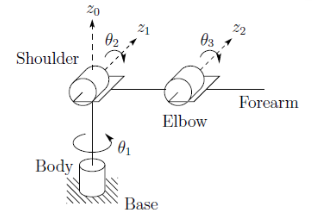

# Задание 1

**Задание 1.** Вычислить  матрицу Якоби (классический способ, геометрический, численный) для трехзвенного манипулятора выше. Длины звенеьв можно считать равными $l_1=l_2=l_3=1$.

Давайти зададим координаты, которыми будем описывать положение энд эффектора. Очевидно, что нам важна конкретная точка в пространстве ⇒ мы должны иметь x,y,z координаты.

Помимо этого эффектор иммет ориентацию в пространстве (другими словами есть матрица поворота из мирового фрейма в фрейм энд эффектора). Очевидно, что 1 джоинт позволяет задать поворот в плоскости xy, а оставшиеся два джоинта представляют собой избыточную конструкцию (их оси вращения параллельны).


Поэтому по факту у нас 2 степени свободы по вращению, но если отдельно указывать каждый угол (в плоскости yx и плоскости образуемой $link_{2}$ и $link_{3}$), то наш первый угол будет просто равняться углу на 1 джоинте - $q_{1}$.


Поэтому я предлагаю описывать ориентацию робота всего одним углом, который будет расчитываться как сумму углов на всех джоинтах:

$$ϕ=q_{1}+q_{2}+q_{3}$$


Положение и ориентация рабочего органа (end-effector) зписывается следующим образом:

\begin{equation}
l_{hand} = l_2 \cos(q_2) + l_3 \cos(q_2 + q_3) \\
z_{hand} = l_2 \sin(q_2) + l_3 \sin(q_2 + q_3) \\
x = l_{hand} \cos(q_1) \\
y = l_{hand} \sin(q_1) \\
z = z_{hand} + l1 \\
\varphi = q_1 + q_2 + q_3
\end{equation}

In [113]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=10, suppress=True)
# robot parameters
params = {'l1': 1,
          'l2': 1,
          'l3': 1}
gen_coords = {'q1': np.pi/8,
              'q2': np.pi/7,
              'q3': np.pi/6}


Зададим параметры робота методом ДХ.


In [114]:
def Rx(q):
    T = np.array([[1,         0,          0, 0],
                  [0, np.cos(q), -np.sin(q), 0],
                  [0, np.sin(q),  np.cos(q), 0],
                  [0,         0,          0, 1]], dtype=float)
    return T


def Ry(q):
    T = np.array([[ np.cos(q), 0, np.sin(q), 0],
                  [         0, 1,         0, 0],
                  [-np.sin(q), 0, np.cos(q), 0],
                  [         0, 0,         0, 1]], dtype=float)
    return T


def Rz(q):
    T = np.array([[np.cos(q), -np.sin(q), 0, 0],
                  [np.sin(q),  np.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]], dtype=float)
    return T


def Tx(x):
    T = np.array([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T


def Ty(y):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T


def Tz(z):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]], dtype=float)
    return T

In [115]:
def DH(d, theta, a, alpha):
    A = Rz(theta) @ Tz(d) @ Tx(a) @ Rx(alpha)
    return A

In [116]:
d_p= np.array([params['l1'], 0, 0])
th_p = np.array([np.pi/2, 0, 0])
a_p = np.array([0, params['l2'], params['l3']])
al_p = np.array([np.pi/2, 0, 0])

In [117]:
def FK(q_cor):
    Matrix = np.eye(4)

    for i, q in enumerate(q_cor):
      Matrix = Matrix @ DH(d_p[i], th_p[i]+q, a_p[i], al_p[i])

    return Matrix

Вот расчёт параметров ДХ для постанвоки системы

![](https://drive.google.com/uc?id=1bADGjh3k9AP4wBNlzBfDT5BZDb5BgOOQ)

Найдём якобиан Аналитически.

In [118]:
import sympy as sym

def j_sym_analytic():
  """
  The function returns the Jacobian (3x3) in symbolic form
  """
  x, y, z = sym.symbols('x, y, z')
  phi, q1, q2, q3 = sym.symbols('varphi, q_1, q_2, q_3')
  l1,l2,l3 = sym.symbols('l_1, l_2, l_3')

  l_hand = l2*sym.cos(q2) + l3*sym.cos(q2+q3)
  z_hand = l2*sym.sin(q2) + l3*sym.sin(q2+q3)

  x = l_hand*sym.cos(q1+np.pi/2)
  y = l_hand*sym.sin(q1+np.pi/2)
  z = z_hand + l1
  phi = q1 + q2 + q3

  J11 = sym.diff(x, q1)
  J12 = sym.diff(x, q2)
  J13 = sym.diff(x, q3)

  J21 = sym.diff(y, q1)
  J22 = sym.diff(y, q2)
  J23 = sym.diff(y, q3)

  J31 = sym.diff(z, q1)
  J32 = sym.diff(z, q2)
  J33 = sym.diff(z, q3)

  J41 = sym.diff(phi, q1)
  J42 = sym.diff(phi, q2)
  J43 = sym.diff(phi, q3)

  J = sym.Matrix([[J11,J12,J13], [J21,J22,J23], [J31,J32,J33], [J41,J42,J43]])
  return J

In [119]:
J = j_sym_analytic()
J

Matrix([
[-(l_2*cos(q_2) + l_3*cos(q_2 + q_3))*sin(q_1 + 1.5707963267949), (-l_2*sin(q_2) - l_3*sin(q_2 + q_3))*cos(q_1 + 1.5707963267949), -l_3*sin(q_2 + q_3)*cos(q_1 + 1.5707963267949)],
[ (l_2*cos(q_2) + l_3*cos(q_2 + q_3))*cos(q_1 + 1.5707963267949), (-l_2*sin(q_2) - l_3*sin(q_2 + q_3))*sin(q_1 + 1.5707963267949), -l_3*sin(q_1 + 1.5707963267949)*sin(q_2 + q_3)],
[                                                              0,                               l_2*cos(q_2) + l_3*cos(q_2 + q_3),                             l_3*cos(q_2 + q_3)],
[                                                              1,                                                               1,                                              1]])

In [120]:
from sympy import lambdify
q1,q2,q3 = sym.symbols('q_1, q_2, q_3')
l1,l2,l3 = sym.symbols('l_1, l_2, l_3')

J_num = lambdify([q1,q2,q3,l1,l2,l3],J)

J_num(gen_coords['q1'], gen_coords['q2'], gen_coords['q3'], params['l1'], params['l2'], params['l3'])

array([[-1.3528265684,  0.4822280086,  0.3161878901],
       [-0.5603591122, -1.1642013986, -0.7633450926],
       [ 0.          ,  1.464288926 ,  0.5633200581],
       [ 1.          ,  1.          ,  1.          ]])

Найдём Якобиан геометрически

Для призматического шарнира:

\begin{equation}
J(q) = \begin{bmatrix}
J_{p_i} \\ J_{\omega_i}
\end{bmatrix} =
\begin{bmatrix}
\mathbf{z}_{i-1} \\
\mathbf{0}
\end{bmatrix}_{6 \times 1}
\end{equation}

Для вращательного шарнира:

\begin{equation}
J(q) = \begin{bmatrix}
J_{p_i} \\ J_{\omega_i}
\end{bmatrix} =
\begin{bmatrix}
\mathbf{z}_{i-1} \times (\mathbf{p}_e - \mathbf{p}_{i-1}) \\
\mathbf{z}_{i-1}
\end{bmatrix}_{6 \times 1}
\end{equation}

Для геометрического способа я задал систему следующим образом

![](https://drive.google.com/uc?id=1KiNaz-f-Ns9SsKqyYtbQ1cONf04hkJ2B)

In [121]:
import numpy as np


def j_geometric(q_coords):
  """
  The function returns the Jacobian (6x3) calculated geometrically
  """
  pe = FK(q_coords)[:3, 3] # end-effector coordinates

  J = np.zeros((6,3))
  for i in range(len(q_coords)):
    pi = FK(q_coords[:i])[:3, 3]
    z = FK(q_coords[:i])[:3, 2]
    Jp = np.cross(z, (pe-pi))

    J[0:3,i] = Jp
    J[3:,i] = z

  return J

#points = get_points(np.array([0,0,0]))
J_gm = j_geometric(np.array([gen_coords['q1'],gen_coords['q2'],gen_coords['q3']]))
J_gm

array([[-1.3528265684,  0.4822280086,  0.3161878901],
       [-0.5603591122, -1.1642013986, -0.7633450926],
       [ 0.          ,  1.464288926 ,  0.5633200581],
       [ 0.          ,  0.9238795325,  0.9238795325],
       [ 0.          ,  0.3826834324,  0.3826834324],
       [ 1.          ,  0.          ,  0.          ]])

In [122]:
def dRz(q):
    T = np.array([[-np.sin(q), -np.cos(q), 0, 0],
                  [np.cos(q),  -np.sin(q), 0, 0],
                  [        0,          0, 0, 0],
                  [        0,          0, 0, 0]], dtype=float)
    return T

def dRx(q):
    T = np.array([[0,         0,          0, 0],
                  [0, -np.sin(q), -np.cos(q), 0],
                  [0, np.cos(q),  -np.sin(q), 0],
                  [0,         0,          0, 0]], dtype=float)
    return T

def dRy(q):
    T = np.array([[ -np.sin(q), 0, np.cos(q), 0],
                  [         0, 0,         0, 0],
                  [-np.cos(q), 0, -np.sin(q), 0],
                  [         0, 0,         0, 0]], dtype=float)
    return T

In [123]:
def j_numerical_derivatives(general_coordinates, robot_params):
  """
  The function returns the Jacobian (6x6) computed with numverical derivatives
  """
  q1, q2, q3 = general_coordinates['q1'], general_coordinates['q2'], general_coordinates['q3']
  l1, l2, l3 = robot_params['l1'], robot_params['l2'], robot_params['l3']

  # forward kinematics
  H = Rz(q1) @ Tz(l1) @ Rx(q2) @ Ty(l2) @ Rx(q3) @ Ty(l3)

  R = H[:3,:3]
  R_inv = R.T

  Hee_transposed = np.eye(4)
  Hee_transposed[:3,:3] = R_inv

  H1 = dRz(q1) @ Tz(l1) @ Rx(q2) @ Ty(l2) @ Rx(q3) @ Ty(l3) @ Hee_transposed
  J1 = np.array([H1[0,3],H1[1,3],H1[2,3], H1[2,1], H1[0,2], H1[1,0]]).reshape((6,1))

  H2 = Rz(q1) @ Tz(l1) @ dRx(q2) @ Ty(l2) @ Rx(q3) @ Ty(l3) @ Hee_transposed
  J2 = np.array([H2[0,3],H2[1,3],H2[2,3], H2[2,1], H2[0,2], H2[1,0]]).reshape((6,1))

  H3 = Rz(q1) @ Tz(l1) @ Rx(q2) @ Ty(l2) @ dRx(q3) @ Ty(l3) @ Hee_transposed
  J3 = np.array([H3[0,3],H3[1,3],H3[2,3], H3[2,1], H3[0,2], H3[1,0]]).reshape((6,1))

  J = np.hstack([J1, J2, J3])
  return J

j_numerical_derivatives(gen_coords, params)


array([[-1.3528265684,  0.4822280086,  0.3161878901],
       [-0.5603591122, -1.1642013986, -0.7633450926],
       [ 0.          ,  1.464288926 ,  0.5633200581],
       [ 0.          ,  0.9238795325,  0.9238795325],
       [ 0.          ,  0.3826834324,  0.3826834324],
       [ 1.          ,  0.          ,  0.          ]])

# Задание 2

**Задание 2.** Построить траекторию при $\mathbf{q}(0)= [0^∘,0^∘,0^∘]$, $\mathbf{q}(2)= [30^∘,90^∘,180^∘]$ при нулевых начальных и конечных угловых скоростях и угловых ускорениях. Построить графики положения, скорости и ускорений шарниров.

Воспользуемся простым полиномиальным способом постановки задачи. Дял каждого шарнира решим отдельную задачу.

Для учета ускорений используется полином пятой степени (quintic polynomial):
\begin{equation}
q(t)=a_5t^5+a_4t^4+a_3t^3+a_2t^2+a_1t+a_0
\end{equation}

In [124]:
def solve_quintic_poly(t0, tf, q0, qf, dq0, dqf, ddq0, ddqf):
  T = np.array([[1, t0, t0**2, t0**3, t0**4, t0**5],
                [1, tf, tf**2, tf**3, tf**4, tf**5],
                [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
                [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
                [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
                [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]])


  x = np.array([q0, qf, dq0, dqf, ddq0, ddqf]).reshape((6,1)) # vector of states
  a_arr = np.linalg.inv(T)  @ x
  return a_arr

In [125]:
def plot_joints(a_arrs, t0, tf, joint_ids):
  colors = ['r', 'g', 'b']
  plt.figure(figsize=(15,12))
  fig, axs = plt.subplots(3, 1)
  y_labels=[r'q(t) ($\degree$)',r'v(t) ($\degree$/s)',r'a(t) ($\degree$/s$^2$)']
  for i in range(3):
    axs[i].set_xlabel('t (s)', fontsize=14)
    axs[i].set_ylabel(y_labels[i], fontsize=14)
    axs[i].grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    axs[i].grid(True)
    axs[i].set_xlim([t0-0.2,tf+0.2])



  for a_arr, joint_id in zip(a_arrs, joint_ids):
      t = np.linspace(t0,tf, int(1000))

      q = a_arr[5]*t**5+ a_arr[4]*t**4+ a_arr[3]*t**3 + a_arr[2]*t**2 + a_arr[1]*t + a_arr[0]

      axs[0].plot(t, q, linewidth=2, color = colors[joint_id], label=f"Joint_{joint_id+1}")

      v = 5*a_arr[5]*t**4+ 4*a_arr[4]*t**3+ 3*a_arr[3]*t**2 + 2*a_arr[2]*t + a_arr[1]

      axs[1].plot(t, v, linewidth=2, color = colors[joint_id], label=f"Joint_{joint_id+1}")

      a = 20*a_arr[5]*t**3+ 12*a_arr[4]*t**2+ 6*a_arr[3]*t + 2*a_arr[2]

      axs[2].plot(t, a, linewidth=2, color = colors[joint_id], label=f"Joint_{joint_id+1}")


  lines_labels = [fig.axes[0].get_legend_handles_labels()]
  lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

  fig.legend(lines, labels, loc='upper center', ncol=3)

In [126]:
def calculate_trajectory(t0, tf, q_start, q_end):
    polynoms=[]
    ids = [i for i in range(3)]
    for q0, qf in zip(q_start, q_end):
      polynom = solve_quintic_poly(t0, tf, q0, qf, 0, 0, 0, 0)
      polynoms.append(polynom)
    plot_joints(polynoms, t0, tf, ids)

<Figure size 1500x1200 with 0 Axes>

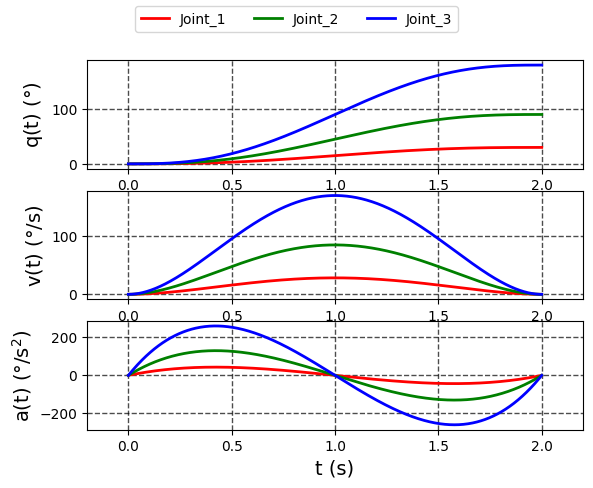

In [127]:
t0 = 0
tf = 2

q_start = np.array([0, 0, 0])
q_end = np.array([30, 90, 180])
calculate_trajectory(t0, tf, q_start, q_end)

# Задание 3

**Задание 3.** При заданных начальных условиях
\begin{array}{|c|c|c|c|}
\hline
& \text{joint 1} & \text{joint 2} & \text{joint 3} \\
\hline
\text{начальное положение, $^\circ$} & 0 & 0 & 0\\
\hline
\text{конечное положение, $^\circ$} & 90 & 30 & 60 \\
\hline
\text{максимальная скорость, $^\circ$/c} & 5 & 4 & 3\\
\hline
\text{максимальное ускорение, $^\circ$/c$^2$} & 2 & 4 & 1\\
\hline
\end{array}

найти траекторию всех шарниров с минимальным затраченным временем. Выполнить синхронизацию движения всех трех шарниров. Построить графики положения, скорости и ускорения до и после синхронизации.

In [128]:
def time_params(params, t0 = 0):
  q0, qf, dq_max, ddq_max = params
  delta_q = qf - q0
  if np.sqrt(delta_q * ddq_max) <= dq_max:
    t1 = np.sqrt(delta_q / ddq_max)
    T = t1
    tf = 2*t1
    print(f'Triangle profile, minimum time: {tf} seconds.')
  else:
    t1 = dq_max / ddq_max
    T = delta_q / dq_max
    tf = t1 + T
    print(f'Trapezoidal profile, minimum time: {tf} seconds.')
  return t0, t1, T, tf

In [129]:
from os import times
def plan_trajectory(q_params, t_params):
  t0, t1, T, tf = t_params
  q0, qf, dq_max, ddq_max = q_params
  time = np.linspace(t0,tf, int(1E3))
  dt = time[1]-time[0]
  q = []
  v = []
  a = []
  q_cur, dq_cur, ddq_cur = 0, 0, ddq_max

  # get the trajectory
  for t in time:
    q.append(q_cur)
    v.append(dq_cur)
    a.append(ddq_cur)
    if t < t1:
      q_cur += dq_cur *dt + ddq_cur / 2 * dt ** 2
      dq_cur += ddq_cur * dt

    if (t > t1) and (t < T):
      q_cur += dq_cur * dt
      dq_cur = dq_max
      ddq_cur = 0

    if t > T:
      q_cur += dq_cur *dt + ddq_cur / 2 * dt ** 2
      dq_cur += ddq_cur * dt
      ddq_cur = -ddq_max


  return time, q, v, a

Trapezoidal profile, minimum time: 20.5 seconds.
Trapezoidal profile, minimum time: 8.5 seconds.
Trapezoidal profile, minimum time: 23.0 seconds.


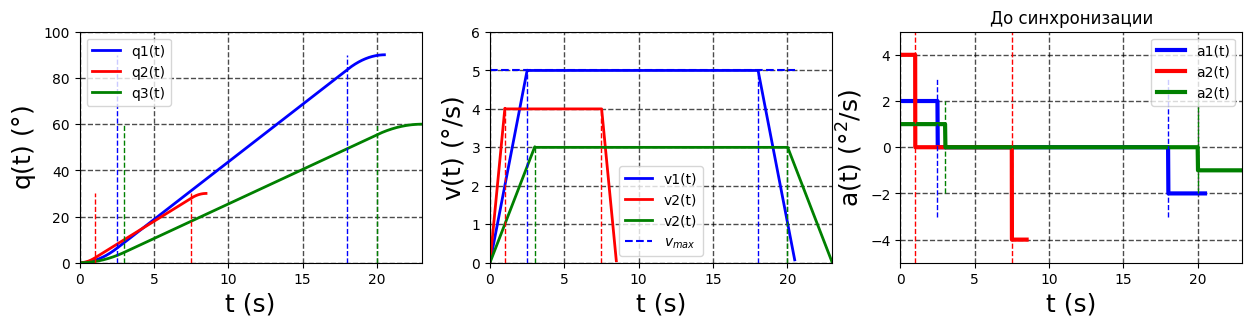

In [130]:
# initial params [q0, qf, dq_m, ddq_m]
j1 = [0., 90., 5., 2.]
j2 = [0., 30., 4., 4.]
j3 = [0., 60., 3., 1.]

t0 = 0.

# calculate trajectory time for each joint
j1_t = time_params(j1)
j2_t = time_params(j2)
j3_t = time_params(j3)

# calculate each trajectory
T1, q1, v1, a1 = plan_trajectory(j1, j1_t)
T2, q2, v2, a2 = plan_trajectory(j2, j2_t)
T3, q3, v3, a3 = plan_trajectory(j3, j3_t)

# extract time params for plotting
_, t11, T11, tf1 = j1_t
_, t12, T12, tf2 = j2_t
_, t13, T13, tf3 = j3_t

time_max = np.max([tf1,tf2,tf3])

plt.figure(figsize=(15,3))
plt.subplot(131)
plt.plot(T1,q1, linewidth=2, label="q1(t)",color='b')
plt.plot(T2,q2, linewidth=2, label="q2(t)", color='r')
plt.plot(T3,q3, linewidth=2, label="q3(t)", color='g')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'q(t) ($\degree$)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0,time_max])
plt.ylim([0,np.max([q1, q2, q3])+10])
plt.vlines([t11,T11], 0, max(q1), linestyles='--', linewidth=1, color='b')
plt.vlines([t13,T13], 0, max(q3), linestyles='--', linewidth=1, color='g')
plt.vlines([t12,T12], 0, max(q2), linestyles='--', linewidth=1, color='r')
plt.legend()


plt.subplot(132)
plt.plot(T1,v1, linewidth=2, label="v1(t)", color='b')
plt.plot(T2,v2, linewidth=2, label="v2(t)", color='r')
plt.plot(T3,v3, linewidth=2, label="v2(t)", color='g')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'v(t) ($\degree$/s)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0,time_max])
plt.ylim([0,np.max([v1, v2, v3])+1])
plt.hlines(j1[2], 0,tf1, linestyles='--', color='b', label=r"$v_{max}$")
plt.vlines([t11,T11], 0, max(v1), linestyles='--', linewidth=1, color='b')
plt.vlines([t13,T13], 0, max(v3), linestyles='--', linewidth=1, color='g')
plt.vlines([t12,T12], 0, max(v2), linestyles='--', linewidth=1, color='r')
plt.legend()


plt.subplot(133)
plt.plot(T1,a1, linewidth=3, label="a1(t)", color='b')
plt.plot(T2,a2, linewidth=3, label="a2(t)", color='r')
plt.plot(T3,a3, linewidth=3, label="a2(t)", color='g')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, time_max])
plt.ylim([np.min([a1, a2, a3])-1,np.max([a1, a2, a3])+1])
plt.vlines([t11,T11], min(a1)-1, max(a1)+1, linestyles='--', linewidth=1, color='b')
plt.vlines([t13,T13], min(a3)-1, max(a3)+1, linestyles='--', linewidth=1, color='g')
plt.vlines([t12,T12], min(a2)-1, max(a2)+1, linestyles='--', linewidth=1, color='r')
plt.legend()
plt.title("До синхронизации")
plt.show()

Нам сильно повезло - самый медленный шарнир медленнее всех доибрается до максимальной скорости. Так как он самый медленный - он использует трапецидальный профиль со своей максимальной скорость, а оставшиеся шарниры будут двигаться на более незиких скоростях, чем их максимально допустимые.

3 шарнир медленнее разгоняется - значит мы можем не перживать о том, что кому-то из оставшихся не хватит врмени разогнаться до нужной скорости. Тогда из геометрических соображений (период разгона и замедления в сумме дадут в два раза меньше расстояния чем дижение с максимальной скоростью за то же время).

$t_{full} = t_{v_{const}}+2*t_{accel}$

$\delta q = q_f-q_0= (t_{v_{const}}+t_{accel}) \cdot v_{syn}$

откуда

$v_{syn} = \frac{q_f-q_0}{t_{v_{const}}+t_{accel}}$

$v_{syn}$ по сути и будет нашим новым ограничением по скорости

а ограничение по ускорению можно логичным способом задать как
$a_{syn} = v_{syn} / t_{accel}$

Естественно всё это лишь работает для нашего случая - самый медленный шарнир по времени медленнее всех набиарет максимальную скорость. В общем случае задача нетривиальна

In [131]:
t0, tac, tconst, tdec = j3_t
t_accel = tac-t0
t_vconst = tconst - tac
assert(t_accel == tdec- tconst)
vq2_max = (j2[1]-j1[0])/(t_vconst + t_accel)
aq2_max = vq2_max/ t_accel

vq1_max = (j1[1]-j1[0])/(t_vconst + t_accel)
aq1_max = vq1_max/ t_accel

Trapezoidal profile, minimum time: 23.0 seconds.
Trapezoidal profile, minimum time: 23.0 seconds.
Trapezoidal profile, minimum time: 23.0 seconds.


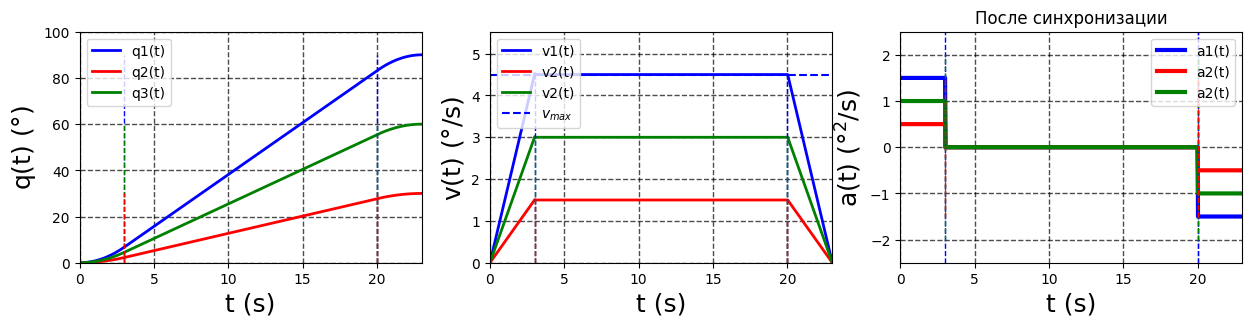

In [132]:
# initial params [q0, qf, dq_m, ddq_m]
j1 = [0., 90., vq1_max, aq1_max]
j2 = [0., 30., vq2_max, aq2_max]
j3 = [0., 60., 3., 1.]

t0 = 0.

# calculate trajectory time for each joint
j1_t = time_params(j1)
j2_t = time_params(j2)
j3_t = time_params(j3)

# calculate each trajectory
T1, q1, v1, a1 = plan_trajectory(j1, j1_t)
T2, q2, v2, a2 = plan_trajectory(j2, j2_t)
T3, q3, v3, a3 = plan_trajectory(j3, j3_t)

# extract time params for plotting
_, t11, T11, tf1 = j1_t
_, t12, T12, tf2 = j2_t
_, t13, T13, tf3 = j3_t

time_max = np.max([tf1,tf2,tf3])

plt.figure(figsize=(15,3))
plt.subplot(131)
plt.plot(T1,q1, linewidth=2, label="q1(t)",color='b')
plt.plot(T2,q2, linewidth=2, label="q2(t)", color='r')
plt.plot(T3,q3, linewidth=2, label="q3(t)", color='g')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'q(t) ($\degree$)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0,time_max])
plt.ylim([0,np.max([q1, q2, q3])+10])
plt.vlines([t11,T11], 0, max(q1), linestyles='--', linewidth=1, color='b')
plt.vlines([t13,T13], 0, max(q3), linestyles='--', linewidth=1, color='g')
plt.vlines([t12,T12], 0, max(q2), linestyles='--', linewidth=1, color='r')
plt.legend()


plt.subplot(132)
plt.plot(T1,v1, linewidth=2, label="v1(t)", color='b')
plt.plot(T2,v2, linewidth=2, label="v2(t)", color='r')
plt.plot(T3,v3, linewidth=2, label="v2(t)", color='g')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'v(t) ($\degree$/s)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0,time_max])
plt.ylim([0,np.max([v1, v2, v3])+1])
plt.hlines(j1[2], 0,tf1, linestyles='--', color='b', label=r"$v_{max}$")
plt.vlines([t11,T11], 0, max(v1), linestyles='--', linewidth=1, color='b')
plt.vlines([t13,T13], 0, max(v3), linestyles='--', linewidth=1, color='g')
plt.vlines([t12,T12], 0, max(v2), linestyles='--', linewidth=1, color='r')
plt.legend()


plt.subplot(133)
plt.plot(T1,a1, linewidth=3, label="a1(t)", color='b')
plt.plot(T2,a2, linewidth=3, label="a2(t)", color='r')
plt.plot(T3,a3, linewidth=3, label="a2(t)", color='g')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, time_max])
plt.ylim([np.min([a1, a2, a3])-1,np.max([a1, a2, a3])+1])
plt.vlines([t11,T11], min(a1)-1, max(a1)+1, linestyles='--', linewidth=1, color='b')
plt.vlines([t13,T13], min(a3)-1, max(a3)+1, linestyles='--', linewidth=1, color='g')
plt.vlines([t12,T12], min(a2)-1, max(a2)+1, linestyles='--', linewidth=1, color='r')
plt.legend()
plt.title("После синхронизации")
plt.show()

# Задание 4


**Задание 4.** Построить траекторию с 4 промежуточными точками. Начальные и конечные значения положения возьмите из задания 3. Выбор промежуточных точек произвольный. Построить графики положения, скорости и ускорения.

In [133]:
def my_lin(lb, ub, steps, spacing=1.1, swap= False):
    span = (ub-lb)
    dx = 1.0 / (steps-1)
    result = np.array([lb + (i*dx)**spacing*span for i in range(steps)])
    if swap:
      result[1], result[3] = result[3], result[1]
    return result

q1 = my_lin(j1[0], j1[1], 6, spacing = 0.7, swap = True)
q2 = my_lin(j2[0], j2[1], 6, spacing = 2.0, swap = True)
q3 = my_lin(j3[0], j3[1], 6, spacing = 0.3, swap = False)

t0, tf = 0, 10
time = np.linspace(t0, tf, num = 6)

In [134]:
def solve_4point_traj(time, q_cords):
  t0, t1, t2, t3 ,t4, t5 = time
  T = np.array([[1, t0, t0**2, t0**3, t0**4, t0**5, t0**6, t0**7, t0**8, t0**9],
                [1, t1, t1**2, t1**3, t1**4, t1**5, t1**6, t1**7, t1**8, t1**9],
                [1, t2, t2**2, t2**3, t2**4, t2**5, t2**6, t2**7, t2**8, t2**9],
                [1, t3, t3**2, t3**3, t3**4, t3**5, t3**6, t3**7, t3**8, t3**9],
                [1, t4, t4**2, t4**3, t4**4, t4**5, t4**6, t4**7, t4**8, t4**9],
                [1, t5, t5**2, t5**3, t5**4, t5**5, t5**6, t5**7, t5**8, t5**9],
                [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4, 6*t0**5, 7*t0**6, 8*t0**7, 9*t0**8],
                [0, 1, 2*t5, 3*t5**2, 4*t5**3, 5*t5**4, 6*t5**5, 7*t5**6, 8*t5**7, 9*t5**8],
                [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3, 30*t0**4, 42*t0**5, 56*t0**6, 72*t0**7],
                [0, 0, 2, 6*t5, 12*t5**2, 20*t5**3, 30*t5**4, 42*t5**5, 56*t5**6, 72*t5**7]])
  x = np.concatenate((q_cords, np.array([0, 0, 0, 0])), axis=0).reshape(-1, 1)
  return np.linalg.inv(T) @ x

In [135]:
def plot_results(time, q_cor):
  a_arr = solve_4point_traj(time, q_cor)
  t0, t1, t2, t3 ,t4, t5 = time
  q0, q1, q2, q3, q4, q5 = q_cor
  t = np.linspace(t0, t5, int(1000))

  q = a_arr[9]*t**9+a_arr[8]*t**8+a_arr[7]*t**7+a_arr[6]*t**6+a_arr[5]*t**5+a_arr[4]*t**4+a_arr[3]*t**3+a_arr[2]*t**2+a_arr[1]*t+a_arr[0]
  dq = 9*a_arr[9]*t**8 + 8*a_arr[8]*t**7 + 7*a_arr[7]*t**6 + 6*a_arr[6]*t**5 + 5*a_arr[5]*t**4 + 4*a_arr[4]*t**3 + 3*a_arr[3]*t**2 + 2*a_arr[2]*t + a_arr[1]
  ddq = 72*a_arr[9]*t**7 + 56*a_arr[8]*t**6 + 42*a_arr[7]*t**5 + 30*a_arr[6]*t**4 + 20*a_arr[5]*t**3 + 12*a_arr[4]*t**2 + 6*a_arr[3]*t**1 + 2*a_arr[2]*t

  all_q = np.concatenate([q.reshape(-1,1),dq.reshape(-1,1),ddq.reshape(-1,1)], axis= 1).T

  plt.figure(figsize=(20,8))
  fig, axs = plt.subplots(3, 1)
  y_labels=[r'q(t) ($\degree$)',r'v(t) ($\degree$/s)',r'a(t) ($\degree$/s$^2$)']
  for i in range(3):
    axs[i].set_xlabel('t (s)', fontsize=14)
    axs[i].set_ylabel(y_labels[i], fontsize=14)
    axs[i].grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    axs[i].grid(True)
    axs[i].set_xlim([t0-0.2,t5+0.2])



  for i in range(3):
      axs[i].plot(t, all_q[i], linewidth=2, color ='blue')
      if i == 0:
        for j in range(len(q_cor)):
          axs[i].scatter(time[j], q_cor[j], color='r', linewidth=7.)

  plt.show()

<Figure size 2000x800 with 0 Axes>

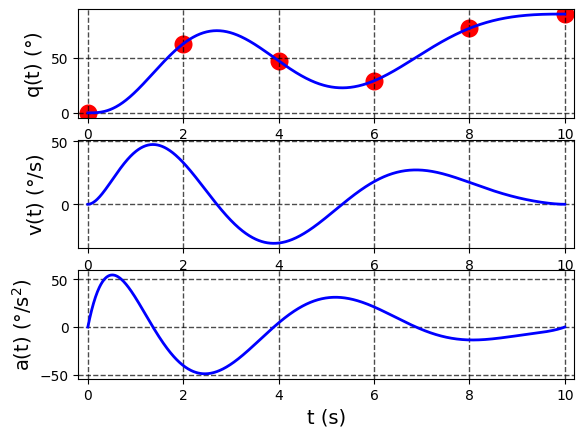

In [136]:
plot_results(time, q1)

<Figure size 2000x800 with 0 Axes>

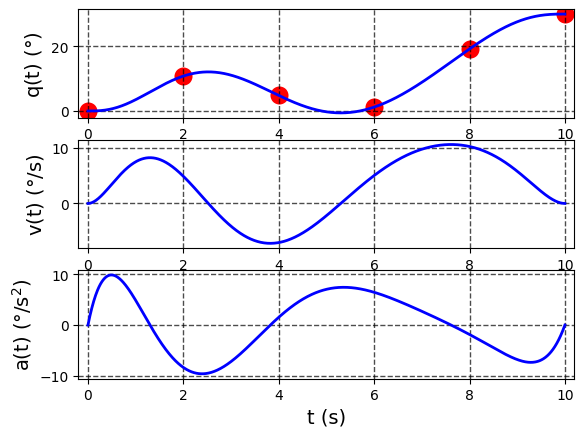

In [137]:
plot_results(time, q2)

<Figure size 2000x800 with 0 Axes>

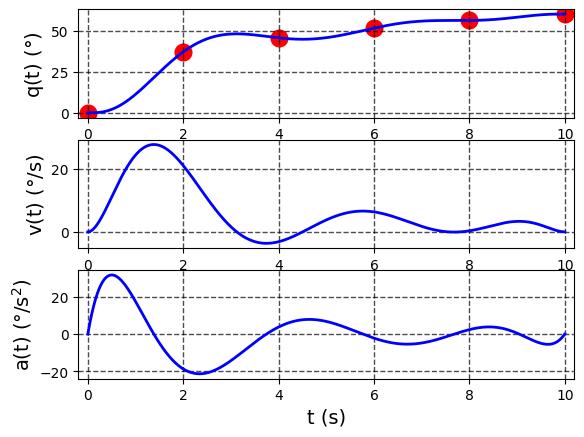

In [138]:
plot_results(time, q3)

# Задание 5

**Задание 5.** Построить траекторию при переходе от точки к точке при заданных начальных и конечныx положениях энд-эффектора $p_0=[0,2,1]$, $p_f=[1.32,1.32,1.5]$. Максимальная линейная скорость - 1 м/с, максимальное линейное ускорение - 1 м/с$^2$. Построить графики положения, скорости и ускорения шарниров и энд-эффектора (для решения вам потребуется посчитать обратную кинематику, а для вычисления скорости потребуется матрица Якоби).  

In [139]:
def get_cosine_law_angle(a, b, c):
  # given all sides of a triangle a, b, c
  # calculate angle gamma between sides a and b using cosine law
  cos_gamma = (a*a + b*b - c*c) / (2*a*b)
  if np.abs(cos_gamma) >1:
      return 0
  sin_gamma = np.sqrt(1 - cos_gamma * cos_gamma)
  gamma = np.arctan2(sin_gamma, cos_gamma)

  return gamma

def IK(pos):
  x, y, z = pos
  theta1 = np.arctan2(y, x) - np.pi/2 # minus the default rotation from DH parameters

  l_hand = np.sqrt(x**2 + y**2)
  z_hand = z-params['l1']
  hyp_hand = np.sqrt(l_hand**2 + z_hand**2)

  alpha = np.arctan2(z_hand, l_hand)
  gamma1 = get_cosine_law_angle(hyp_hand, params['l2'],  params['l3'])
  gamma2 = get_cosine_law_angle(params['l2'], params['l3'], hyp_hand)

  theta2 = alpha - gamma1
  theta3 = np.pi - gamma2

  return np.array([theta1, theta2, theta3])

In [140]:
x, y, z = FK(np.array([gen_coords['q1'],gen_coords['q2'],gen_coords['q3']]))[:3, 3]
pos = np.array([x, y, z])
IK(pos)

array([0.3926990817, 0.4487989505, 0.5235987756])

In [141]:
x, y, z = FK(np.array([0, 0, 0]))[:3, 3]
pos = np.array([x, y, z])
IK(pos)

array([0., 0., 0.])

In [142]:
np.array([gen_coords['q1'],gen_coords['q2'],gen_coords['q3']])

array([0.3926990817, 0.4487989505, 0.5235987756])

Обратная кинематика работает хорошо, давайте теперь опредлимся с траекторией. Наилучшим вариантом будет идти просто по прямой от $p_0=[0,2,1]$ до $p_f=[1.32,1.32,1.5]$.
Найдя расстояние между точками мы можем построить трапецевидный профиль скорости энд эффектора по направлению прямой между двумя точками.


In [143]:
p0 = np.array([0, 2, 1])
pf = np.array([1.32, 1.32, 1.5])

path = pf-p0

distance = np.linalg.norm(path)

v_ee_max = 1
a_ee_max = 1

v_ee_unit = path/distance
a_ee_unit = v_ee_unit

In [144]:
def plan_trajectory(q_params, t_params, num_slices = 1E3):
  t0, t1, T, tf = t_params
  q0, qf, dq_max, ddq_max = q_params
  time = np.linspace(t0,tf, int(num_slices))
  dt = time[1]-time[0]
  q = []
  v = []
  a = []
  q_cur, dq_cur, ddq_cur = 0, 0, ddq_max

  # get the trajectory
  for t in time:
    q.append(q_cur)
    v.append(dq_cur)
    a.append(ddq_cur)
    if t < t1:
      q_cur += dq_cur *dt + ddq_cur / 2 * dt ** 2
      dq_cur += ddq_cur * dt

    if (t > t1) and (t < T):
      q_cur += dq_cur * dt
      dq_cur = dq_max
      ddq_cur = 0

    if t > T:
      q_cur += dq_cur *dt + ddq_cur / 2 * dt ** 2
      dq_cur += ddq_cur * dt
      ddq_cur = -ddq_max


  return time, q, v, a

Давайте решим задачу трапецевидного профиля для траектории энд эффектора


In [145]:
# initial params [q0, qf, dq_m, ddq_m]
end_ef = [0., distance, v_ee_max , a_ee_max]

t0 = 0.

# calculate trajectory time for each joint
end_ef_t = time_params(end_ef)

# calculate each trajectory
Tee, qee, vee, aee = plan_trajectory(end_ef, end_ef_t, 1E4)

Trapezoidal profile, minimum time: 2.5667801377347113 seconds.


In [146]:
v_ee_unit.reshape(-1, 1)

array([[ 0.8424921712],
       [-0.4340111185],
       [ 0.3191258224]])

In [147]:
pos_ee = p0.reshape(-1, 1) + v_ee_unit.reshape(-1, 1) * qee
x, y, z = pos_ee
pos_ee = pos_ee.T

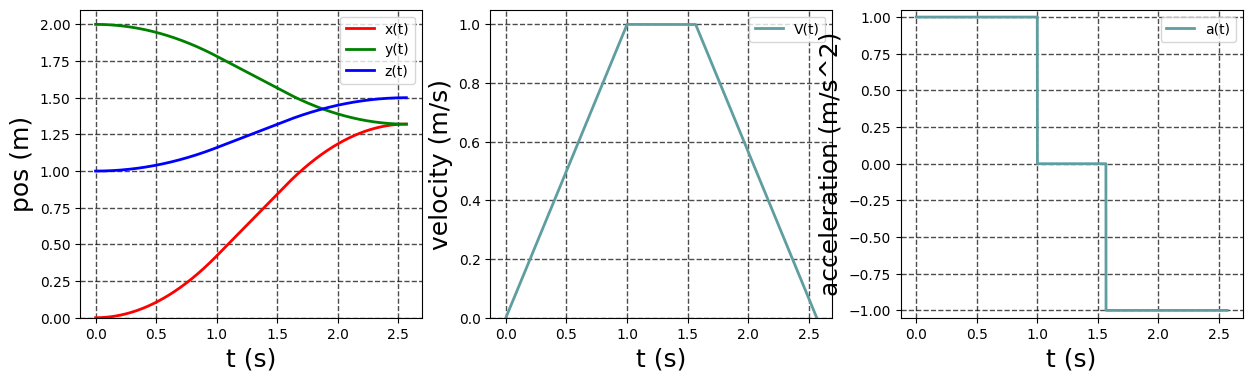

In [148]:
_, t_1e, T_1e, tf_1e = end_ef_t
time_max = tf_1e

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(Tee, x, linewidth=2, label="x(t)",color='r')
plt.plot(Tee, y, linewidth=2, label="y(t)",color='g')
plt.plot(Tee, z, linewidth=2, label="z(t)",color='b')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'pos (m)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([-time_max*0.05, time_max*1.05])
plt.ylim([np.min([x, y, z])*1.05, np.max([x, y, z])*1.05])
plt.legend()


plt.subplot(132)
plt.plot(Tee, vee, linewidth=2, label="V(t)", color='cadetblue')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'velocity (m/s)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([-time_max*0.05, time_max*1.05])
plt.ylim([np.min(vee)*1.05, np.max(vee)*1.05])
plt.legend()

plt.subplot(133)
plt.plot(Tee, aee, linewidth=2, label="a(t)",color='cadetblue')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'acceleration (m/s^2)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([-time_max*0.05, time_max*1.05])
plt.ylim([np.min(aee)*1.05, np.max(aee)*1.05])
plt.legend()

Зная необходимые позиции и скорости энд эффектора в каждый момент времени мы можем с помощью обратной кинмеатики найти позиции джоинтов, откуда сможем посчитать Якобиан и решить уравнение $J \dot{q} = \dot{x}_{ee}$ для $\dot{q}$ как неизвестной с помощью инверсии Якобиана

$$ \dot{q} = J(q)^{-1} \dot{x}_{ee}$$

In [149]:
def get_q_dq(pos_ee, v_ee):
    q_cors = IK(pos_ee)
    v_ee = v_ee_unit * v_ee
    J = j_geometric(q_cors)
    q_dot = np.linalg.pinv(J)[:, :3] @ v_ee
    return q_cors, q_dot

In [ ]:
q = []
dq = []
for i in range(len(Tee)):
  q_cur, dq_cur = get_q_dq(pos_ee[i], vee[i])
  q.append(q_cur)
  dq.append(dq_cur)


dq= np.array(dq).T
q= np.array(q).T

In [ ]:
dt = Tee[1]-Tee[0]
ddq1 = np.gradient(dq[0], dt)
ddq2 = np.gradient(dq[1], dt)
ddq3 = np.gradient(dq[2], dt)

In [ ]:
plt.figure(figsize=(12,15))
plt.subplot(311)
plt.plot(Tee, q[0], linewidth=2, label="q1(t)",color='r')
plt.plot(Tee, q[1], linewidth=2, label="q2(t)",color='g')
plt.plot(Tee, q[2], linewidth=2, label="q3(t)",color='b')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'angle ($\degree$)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()


plt.subplot(312)
plt.plot(Tee, dq[0], linewidth=2, label=r"$\dot{q}_{1}$(t)",color='r')
plt.plot(Tee, dq[1], linewidth=2, label="$\dot{q}_{2}$(t)",color='g')
plt.plot(Tee, dq[2], linewidth=2, label="$\dot{q}_{3}$(t)",color='b')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r'abgular velocity ($\degree$/s)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()

plt.subplot(313)
plt.plot(Tee, ddq1, linewidth=2, label="$\ddot{q}_{1}$(t)",color='r')
plt.plot(Tee, ddq2, linewidth=2, label="$\ddot{q}_{2}$(t)",color='g')
plt.plot(Tee, ddq3, linewidth=2, label="$\ddot{q}_{3}$(t)",color='b')
plt.xlabel('t (s)', fontsize=18)
plt.ylabel(r' angular acceleration ($\degree$/s^2)', fontsize=18)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()

# Задание 6

**Задание 6**. Нарисовать с помощью matplotlib начальную, конечную конфигурации робота и путь, пройденный энд-эффектором, в предыдущем задании.


In [ ]:
def find_joints_pos(q_cords):
    jpos = []
    for i in range(len(q)+1):
      jpos.append(FK(q_cords[:i])[:3,3])
    return np.array(jpos)

In [ ]:
robot0 = find_joints_pos(q.T[0])
robotf = find_joints_pos(q.T[-1])

In [ ]:
robotf

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(robot0[:, 0], robot0[:, 1], robot0[:, 2], color= 'red')
ax.plot(robot0[:, 0], robot0[:, 1], robot0[:, 2],color='orange', label='robot $t_0$')

ax.scatter(robotf[:, 0], robotf[:, 1], robotf[:, 2], color='green')
ax.plot(robotf[:, 0], robotf[:, 1], robotf[:, 2], color='blue', label='robot $t_f$')

ax.plot(x, y, z, color='teal', label='End effector trajectory')
ax.legend()

>**Важно!**
>
> Использование готовых библиотек запрещено, весь код должен быть написан с нуля.

> **Требования:**
>
> Вам необходимо отправить рабочий код (Python) и отчет. Можно использовать colab.
> Отчет должен содержать:
>
>- полученная матрица Якоби
- графики положения, скорости и ускорений шарниров для соответствующих пунктов.

>**Срок:**
>
>Работу необходимо отправить до **11.10 23:59**.